In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def  plot_consumption(df, temp_label, wu_time, t0, ignition_time):
  
    plt.plot(df['SECONDS']-t0, df['VALUE'], label=r'$t_0$=%.0f C' % temp_label, color='orange')

    plt.vlines(ignition_time - t0,           0, 6, color='b')
    plt.vlines(ignition_time - t0 + wu_time, 0, 6, color='r')

    plt.xlabel('t, [sec]')
    plt.ylabel('instant consumption, [L/h]')

    plt.legend()
    plt.grid()
    plt.show()    

def integrate_consumption(df, wu_time, ignition_time):
    i       = 0
    l_total = 0
    
    while (df.loc[i,'SECONDS']-ignition_time < wu_time):
        i        = i + 1
        dt       =  df.loc[i+1, 'SECONDS'] - df.loc[i, 'SECONDS']
        l_mean   = (df.loc[i+1, 'VALUE']   + df.loc[i, 'VALUE']) / 2
        l_total += l_mean * dt / 3600
        
    return l_total

def calc_consumption(df, wu_time, init_temp):
    df_ic         = df[df.loc[:,'PID']==('Мгновенный расход топлива (л/ч)')].reset_index(drop=True) # instant consumption
    t0            = df.loc[0, 'SECONDS']
    ignition_time = df_ic[df_ic.loc[:,'VALUE']>0.0].min()['SECONDS']
    
    print('Warm-up interval')
    plot_consumption(df_ic, init_temp, wu_time, t0, ignition_time)
    
    l_total = integrate_consumption(df_ic, wu_time, ignition_time)
    
    print(f'{"%.4f" % l_total} L of fuel was burned in {wu_time} seconds of warming up from {init_temp} °C')
    return l_total

Запись данных с CAN шины выполнена через OBD ELM327 адаптер при помощи программы CarScanner. \
Программа позволяет экспортировать csv-файлы в трех различных представлениях, называемых внутри программы CSV#1, CSV#2, BRC. \
<b>CSV#1</b> является наиболее простым для обработки, поскольку каждая строка содержит набор значений, измеренных в один момент времени. Однако, этот набор значительно скромнее, чем в CSV#2. \
<b>CSV#2</b> содержит информацию о большем количестве параметров, однако в каждый момент времени измеряется только один из них. Значениям остальных присваивается NaN. Возможно, этот недостаток преодолим увеличением интервала измерений, нужно уделить этому внимание. \
<b>BRC</b> самый экзотический из трех. Не используется в обработке.

Важно, что CarScanner пишет единый лог, хранимый в формате .brc, а меняется лишь его представление при экспорте.


In [35]:
init_temp_l = [] # list of initial temperatures of colant fluid during ignition 
                 # which is supposed to be equal to air temperature [Celcius degrees]
cons_fuel_l = [] # list of burn fuel amount [litres]

In [36]:
df = pd.read_csv("../meas/2021-12-23 20-36-51-manycolumns.csv", sep=',')
print(df['Температура всасываемого воздуха (℃)'].dropna())
print(df['Температура охлаждающей жидкости (℃)'].dropna())

401    -2.0
415    -2.0
430    -2.0
444    -2.0
459    -2.0
       ... 
1858   -2.0
1872   -2.0
1887   -2.0
1901   -2.0
1916   -2.0
Name: Температура всасываемого воздуха (℃), Length: 64, dtype: float64
393      -1.0
423      -1.0
452      -1.0
481      -1.0
510      -1.0
         ... 
14438    74.0
14447    74.0
14456    74.0
14465    74.0
14474    74.0
Name: Температура охлаждающей жидкости (℃), Length: 1408, dtype: float64


Warm-up interval


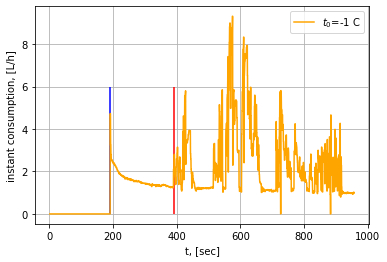

0.0897 L of fuel was burned in 200 seconds of warming up from -1.0 °C


In [37]:
df        = pd.read_csv("../meas/2021-12-23 20-36-51-manycolumns.csv", sep=',')
init_temp = df['Температура охлаждающей жидкости (℃)'].dropna().min()

df        = pd.read_csv("../meas/2021-12-23 20-36-51-sep-chgd.csv", sep=';')
wu_time   = 200

cons_fuel = calc_consumption(df, wu_time, init_temp)

init_temp_l.append(init_temp)
cons_fuel_l.append(cons_fuel)

Warm-up interval


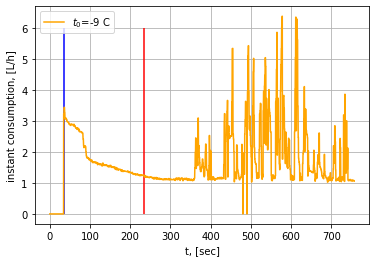

0.1023 L of fuel was burned in 200 seconds of warming up from -9.0 °C


In [38]:
df        = pd.read_csv("../meas/2021-12-26 16-34-08-csv2.csv", sep=',')
init_temp = df['Температура охлаждающей жидкости (℃)'].dropna().min()

df        = pd.read_csv("../meas/2021-12-26 16-34-08-csv1.csv", sep=';')
wu_time   = 200

cons_fuel = calc_consumption(df, wu_time, init_temp)

init_temp_l.append(init_temp)
cons_fuel_l.append(cons_fuel)

Warm-up interval


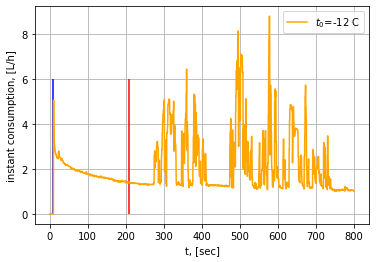

0.1030 L of fuel was burned in 200 seconds of warming up from -12.0 °C


In [39]:
df        = pd.read_csv("../meas/2021-12-28 07-53-27-csv2.csv", sep=',')
init_temp = df['Температура охлаждающей жидкости (℃)'].dropna().min()

df        = pd.read_csv("../meas/2021-12-28 07-53-27-csv1.csv", sep=';')
wu_time   = 200

cons_fuel = calc_consumption(df, wu_time, init_temp)

init_temp_l.append(init_temp)
cons_fuel_l.append(cons_fuel)

Warm-up interval


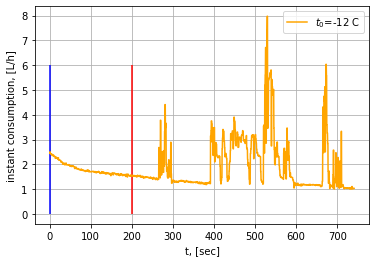

0.1002 L of fuel was burned in 200 seconds of warming up from -12.0 °C


In [40]:
df        = pd.read_csv("../meas/2022-01-01 11-33-17-csv2.csv", sep=',')
init_temp = df['Температура охлаждающей жидкости (℃)'].dropna().min()

df        = pd.read_csv("../meas/2022-01-01 11-33-17-csv1.csv", sep=';')
wu_time   = 200

cons_fuel = calc_consumption(df, wu_time, init_temp)

init_temp_l.append(init_temp)
cons_fuel_l.append(cons_fuel)

Warm-up interval


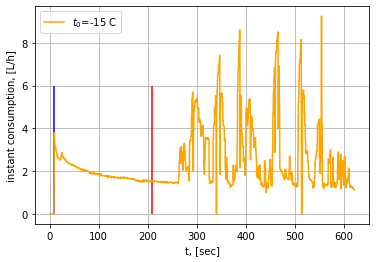

0.1081 L of fuel was burned in 200 seconds of warming up from -15.0 °C


In [41]:
df        = pd.read_csv("../meas/2022-01-20 09-03-54-csv2.csv", sep=',')
init_temp = df['Температура охлаждающей жидкости (℃)'].dropna().min()

df        = pd.read_csv("../meas/2022-01-20 09-03-54-csv1.csv", sep=';')
wu_time   = 200

cons_fuel = calc_consumption(df, wu_time, init_temp)

init_temp_l.append(init_temp)
cons_fuel_l.append(cons_fuel)

In [57]:
mkdir ../build/

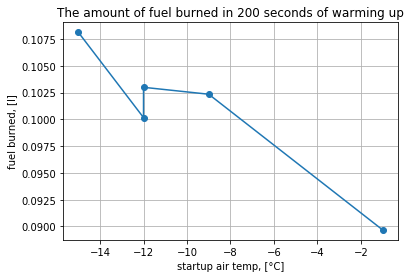

In [59]:
plt.plot(init_temp_l, cons_fuel_l, 'o-')

plt.grid()
plt.xlabel('startup air temp, [°C]')
plt.ylabel('fuel burned, [l]')
plt.title('The amount of fuel burned in 200 seconds of warming up')

plt.savefig(fname='../build/fuel_consumption.png', dpi=300)
plt.show()